##Pattern Recognition: Assignment 4
###Group 20 Members:<br>
CED17I028 <br>
CED17I048 <br>
COE17B009

Drive mount and import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [3]:
os.chdir('/content/drive/MyDrive/Pattern Recognition/Assignment 4')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [5]:
from cvxopt import matrix, solvers           #For Quadratic Programming

In [6]:
from sympy import *

##Question 4

Reading Iris Dataset

In [7]:
iris_dataset = pd.read_csv("Iris_dataset.csv",index_col=False)
print(iris_dataset.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


Taking the two features only

In [8]:
iris_data = iris_dataset.drop(['sepal.length','petal.width'], axis=1)
print(iris_data)

     sepal.width  petal.length    variety
0            3.5           1.4     Setosa
1            3.0           1.4     Setosa
2            3.2           1.3     Setosa
3            3.1           1.5     Setosa
4            3.6           1.4     Setosa
..           ...           ...        ...
145          3.0           5.2  Virginica
146          2.5           5.0  Virginica
147          3.0           5.2  Virginica
148          3.4           5.4  Virginica
149          3.0           5.1  Virginica

[150 rows x 3 columns]


Dividing the Data into 3 sets (Setosa vs Versicolor, Setosa vs Virginica, Versicolor vs Virginica<br>
Since Single Perceptron and SVM can handle two classes

In [9]:
iris_data_12 = iris_data[iris_data['variety']!='Virginica']
print(iris_data_12)

    sepal.width  petal.length     variety
0           3.5           1.4      Setosa
1           3.0           1.4      Setosa
2           3.2           1.3      Setosa
3           3.1           1.5      Setosa
4           3.6           1.4      Setosa
..          ...           ...         ...
95          3.0           4.2  Versicolor
96          2.9           4.2  Versicolor
97          2.9           4.3  Versicolor
98          2.5           3.0  Versicolor
99          2.8           4.1  Versicolor

[100 rows x 3 columns]


In [10]:
var=[]
for i in range(len(iris_data_12)):
    if iris_data_12['variety'].iloc[i]=='Setosa':
        var.append(1)
    else:
        var.append(-1)
iris_data_12['var'] = var
iris_data_12 = iris_data_12.drop(['variety'],axis=1)
print(iris_data_12)

    sepal.width  petal.length  var
0           3.5           1.4    1
1           3.0           1.4    1
2           3.2           1.3    1
3           3.1           1.5    1
4           3.6           1.4    1
..          ...           ...  ...
95          3.0           4.2   -1
96          2.9           4.2   -1
97          2.9           4.3   -1
98          2.5           3.0   -1
99          2.8           4.1   -1

[100 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
iris_data_13 = iris_data[iris_data['variety']!='Versicolor']
print(iris_data_13)

     sepal.width  petal.length    variety
0            3.5           1.4     Setosa
1            3.0           1.4     Setosa
2            3.2           1.3     Setosa
3            3.1           1.5     Setosa
4            3.6           1.4     Setosa
..           ...           ...        ...
145          3.0           5.2  Virginica
146          2.5           5.0  Virginica
147          3.0           5.2  Virginica
148          3.4           5.4  Virginica
149          3.0           5.1  Virginica

[100 rows x 3 columns]


In [12]:
var=[]
for i in range(len(iris_data_13)):
    if iris_data_13['variety'].iloc[i]=='Setosa':
        var.append(1)
    else:
        var.append(-1)
iris_data_13['var'] = var
iris_data_13 = iris_data_13.drop(['variety'],axis=1)
print(iris_data_13)

     sepal.width  petal.length  var
0            3.5           1.4    1
1            3.0           1.4    1
2            3.2           1.3    1
3            3.1           1.5    1
4            3.6           1.4    1
..           ...           ...  ...
145          3.0           5.2   -1
146          2.5           5.0   -1
147          3.0           5.2   -1
148          3.4           5.4   -1
149          3.0           5.1   -1

[100 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [13]:
iris_data_23 = iris_data[iris_data['variety']!='Setosa']
print(iris_data_23)

     sepal.width  petal.length     variety
50           3.2           4.7  Versicolor
51           3.2           4.5  Versicolor
52           3.1           4.9  Versicolor
53           2.3           4.0  Versicolor
54           2.8           4.6  Versicolor
..           ...           ...         ...
145          3.0           5.2   Virginica
146          2.5           5.0   Virginica
147          3.0           5.2   Virginica
148          3.4           5.4   Virginica
149          3.0           5.1   Virginica

[100 rows x 3 columns]


In [14]:
var=[]
for i in range(len(iris_data_23)):
    if iris_data_23['variety'].iloc[i]=='Versicolor':
        var.append(1)
    else:
        var.append(-1)
iris_data_23['var'] = var
iris_data_23 = iris_data_23.drop(['variety'],axis=1)
print(iris_data_23)

     sepal.width  petal.length  var
50           3.2           4.7    1
51           3.2           4.5    1
52           3.1           4.9    1
53           2.3           4.0    1
54           2.8           4.6    1
..           ...           ...  ...
145          3.0           5.2   -1
146          2.5           5.0   -1
147          3.0           5.2   -1
148          3.4           5.4   -1
149          3.0           5.1   -1

[100 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


####Training For Perceptron

In [15]:
data_aug_12 = pd.DataFrame(list(zip(iris_data_12['petal.length'],iris_data_12['sepal.width'], [1 for i in range(len(iris_data_12))],iris_data_12['var'])), columns=['petal.length','sepal.width','augment','var'])
print(data_aug_12)

    petal.length  sepal.width  augment  var
0            1.4          3.5        1    1
1            1.4          3.0        1    1
2            1.3          3.2        1    1
3            1.5          3.1        1    1
4            1.4          3.6        1    1
..           ...          ...      ...  ...
95           4.2          3.0        1   -1
96           4.2          2.9        1   -1
97           4.3          2.9        1   -1
98           3.0          2.5        1   -1
99           4.1          2.8        1   -1

[100 rows x 4 columns]


In [16]:
data_aug_13 = pd.DataFrame(list(zip(iris_data_13['petal.length'],iris_data_13['sepal.width'], [1 for i in range(len(iris_data_13))],iris_data_13['var'])), columns=['petal.length','sepal.width','augment','var'])
print(data_aug_13)

    petal.length  sepal.width  augment  var
0            1.4          3.5        1    1
1            1.4          3.0        1    1
2            1.3          3.2        1    1
3            1.5          3.1        1    1
4            1.4          3.6        1    1
..           ...          ...      ...  ...
95           5.2          3.0        1   -1
96           5.0          2.5        1   -1
97           5.2          3.0        1   -1
98           5.4          3.4        1   -1
99           5.1          3.0        1   -1

[100 rows x 4 columns]


In [17]:
data_aug_23 = pd.DataFrame(list(zip(iris_data_23['petal.length'],iris_data_23['sepal.width'], [1 for i in range(len(iris_data_23))],iris_data_23['var'])), columns=['petal.length','sepal.width','augment','var'])
print(data_aug_23)

    petal.length  sepal.width  augment  var
0            4.7          3.2        1    1
1            4.5          3.2        1    1
2            4.9          3.1        1    1
3            4.0          2.3        1    1
4            4.6          2.8        1    1
..           ...          ...      ...  ...
95           5.2          3.0        1   -1
96           5.0          2.5        1   -1
97           5.2          3.0        1   -1
98           5.4          3.4        1   -1
99           5.1          3.0        1   -1

[100 rows x 4 columns]


Splitting Features and Labels

In [18]:
def split(data_aug):
    data_up = data_aug.copy()
    for i in range(len(data_up)):
        if(data_up['var'][i] == 1):
            data_up['petal.length'][i] = - data_up['petal.length'][i]
            data_up['sepal.width'][i] = -data_up['sepal.width'][i]
            data_up['augment'][i] = -data_up['augment'][i]
    # print(data_up)
    data_up = data_up.drop(['var'], axis=1)
    data_up = np.array(data_up)
    # print(data_up)

    labels = data_aug['var']
    labels = np.array(labels)
    # print(labels)

    return (data_up, labels)

In [19]:
data_up_12, labels_12 = split(data_aug_12)
data_up_13, labels_13 = split(data_aug_13)
data_up_23, labels_23 = split(data_aug_23)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:
def Perceptron_Train(data_up, labels, eta):
    
    threshold = 5000
    A = np.zeros(len(data_up[0]))

    # print(A)

    for epoch in range(threshold):
        ctr = 0
    
        for inp, label in zip(data_up, labels):
            summation = np.dot(inp, A)
            if summation <= 0:
                A += eta*inp
                ctr = 0

            else:
                ctr+=1
            
        if ctr == len(data_up):     #Until all input is correctly classified
            break
    print(epoch)
    return A


In [21]:
x1, x2, b = symbols('x1 x2 1')
P = np.array([x1,x2, b])
print(P)

[x1 x2 1]


In [22]:
eta = 0.01
A_12 = Perceptron_Train(data_up_12, labels_12, eta)
print(A_12)

3
[ 0.052 -0.041 -0.01 ]


In [23]:
Percep_equation_12 = np.dot(A_12.T, P)
print("Decision Boundary between Setosa and Versicolor: ", Percep_equation_12, ' = 0')

Decision Boundary between Setosa and Versicolor:  -0.01*1 + 0.052*x1 - 0.041*x2  = 0


In [24]:
eta = 0.01
A_13 = Perceptron_Train(data_up_13, labels_13, eta)
print(A_13)

2
[ 0.032 -0.037 -0.01 ]


In [25]:
Percep_equation_13 = np.dot(A_13.T, P)
print("Decision Boundary between Setosa and Virginica: ", Percep_equation_13, ' = 0')

Decision Boundary between Setosa and Virginica:  -0.01*1 + 0.032*x1 - 0.037*x2  = 0


In [26]:
eta = 0.01
A_23 = Perceptron_Train(data_up_23, labels_23, eta)
print(A_23)

4999
[ 1.296 -0.837 -3.43 ]


In [27]:
Percep_equation_23 = np.dot(A_23.T, P)
print("Decision Boundary between Versicolor and Virginica: ", Percep_equation_23, ' = 0')

Decision Boundary between Versicolor and Virginica:  -3.42999999999997*1 + 1.29600000000016*x1 - 0.837*x2  = 0


Plotting the Decision Boundary

In [28]:
def plot_percep(A, data_aug):
    a = np.linspace(-1,7,100)
    b = -a*A[0]/A[1] - A[2]/A[1]

    sns.set(style="darkgrid")
    sns.lmplot(x='petal.length',y='sepal.width', data=data_aug, fit_reg=False, hue='var', legend=True)
    plt.plot(a,b)
    plt.show()

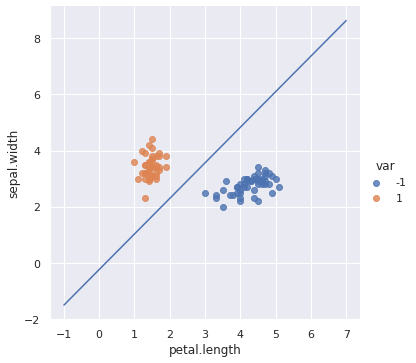

In [29]:
plot_percep(A_12,data_aug_12)

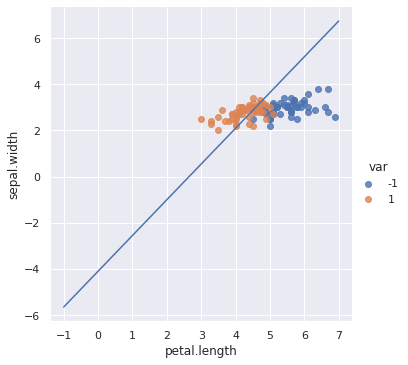

In [30]:
plot_percep(A_23,data_aug_23)

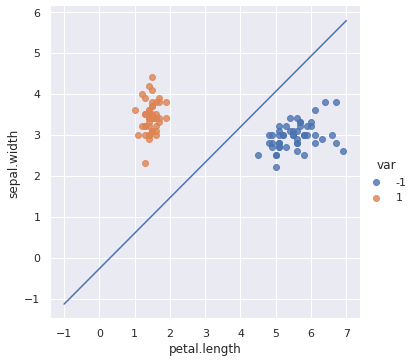

In [31]:
plot_percep(A_13, data_aug_13)

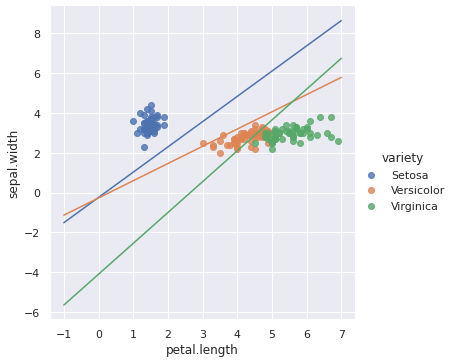

In [32]:
a = np.linspace(-1,7,100)
b_12 = -a*A_12[0]/A_12[1] - A_12[2]/A_12[1]
b_13 = -a*A_13[0]/A_13[1] - A_13[2]/A_13[1]
b_23 = -a*A_23[0]/A_23[1] - A_23[2]/A_23[1]
sns.set(style="darkgrid")
sns.lmplot(x='petal.length',y='sepal.width', data=iris_data, fit_reg=False, hue='variety', legend=True)
# plt.scatter(data_up[:50][0], data_up[:50][1])
# plt.scatter(data_up[50:][0],data_up[50:][1])
plt.plot(a,b_12)
plt.plot(a,b_13)
plt.plot(a,b_23)
plt.show()

#### Training with SVM

In [ ]:
def data_svm_split(iris):
    X = iris[['petal.length','sepal.width']]
    X = np.array(X)
    # print(X)

    Y = iris['var']
    Y = np.array(Y).reshape(len(iris),1)
    # print(Y)

    return (X,Y)

In [ ]:
X_12,Y_12 = data_svm_split(iris_data_12)
X_13,Y_13 = data_svm_split(iris_data_13)
X_23,Y_23 = data_svm_split(iris_data_23)

In [ ]:
def SVM_Train(X,Y):
    m = len(X)

    # print(np.dot(Y,Y.T))
    # print(np.dot(X,X.T))
    P = matrix(np.multiply(np.dot(Y, Y.T), np.dot(X, X.T)))
    # print(P)
    q = matrix(np.ones(m) * -1)
    g1 = np.asarray(np.diag(np.ones(m) * -1))
    # g2 = np.asarray(np.diag(np.ones(m)))
    # G = matrix(np.append(g1, g2, axis=0))
    print(np.array(g1).shape)
    h = matrix(np.zeros(m))
    A = np.reshape((Y.T), (1,m))
    b=[[0]]
    # b = np.array(b).reshape(m,1)

    P = matrix(P,(m,m),'d') #dense
    A = matrix(A,(1,m),'d')
    g1 = matrix(g1,(m,m),'d')
    b = matrix(b,(1,1),'d')

    sol = solvers.qp(P, q, g1, h, A, b)
    alpha = np.array(sol['x'])
    ind = (alpha > 1e-4).flatten()
    print(ind)

    W = np.dot(np.transpose(alpha*Y),X)
    print(W)

    for i in range(m):
        if ind[i] == True:
            W0 = 1 - np.dot(X[i],W.T)
            print
            break

    print(W0)

    return (W, W0)

In [ ]:
x1, x2 = symbols('x1 x2')
P_SVM = np.array([x1,x2])
print(P_SVM)

[x1 x2]


In [ ]:
W_12,W0_12 = SVM_Train(X_12,Y_12)

(100, 100)
     pcost       dcost       gap    pres   dres
 0: -4.3867e+00 -8.1716e+00  3e+02  1e+01  2e+00
 1: -2.3798e+00 -2.5258e+00  2e+01  1e+00  2e-01
 2: -4.3479e-01 -1.7538e+00  2e+00  5e-02  6e-03
 3: -6.7595e-01 -1.0544e+00  5e-01  1e-02  1e-03
 4: -8.1435e-01 -1.1260e+00  4e-01  4e-03  5e-04
 5: -1.0085e+00 -1.0271e+00  2e-02  8e-05  1e-05
 6: -1.0251e+00 -1.0253e+00  2e-04  9e-07  1e-07
 7: -1.0253e+00 -1.0253e+00  2e-06  9e-09  1e-09
 8: -1.0253e+00 -1.0253e+00  2e-08  9e-11  1e-11
Optimal solution found.
[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False F

In [ ]:
SVM_equation_12 = np.dot(W_12[0].T, P_SVM) + W0_12[0]
print("Decision Boundary between Setosa and Versicolor: ", SVM_equation_12, ' = 0')

Decision Boundary between Setosa and Versicolor:  -1.25714285940527*x1 + 0.685714284290052*x2 + 1.05714286628384  = 0


In [ ]:
W_13,W0_13 = SVM_Train(X_13,Y_13)

(100, 100)
     pcost       dcost       gap    pres   dres
 0: -3.3137e+00 -4.9765e+00  2e+02  2e+01  1e+00
 1: -1.6126e-01 -8.1531e-01  1e+01  9e-01  8e-02
 2:  1.9106e-02 -6.5205e-01  9e-01  1e-02  1e-03
 3: -1.5487e-01 -2.7974e-01  1e-01  7e-04  6e-05
 4: -2.2572e-01 -2.8972e-01  6e-02  1e-04  1e-05
 5: -2.5983e-01 -2.6459e-01  5e-03  1e-05  8e-07
 6: -2.6415e-01 -2.6421e-01  5e-05  1e-07  9e-09
 7: -2.6420e-01 -2.6420e-01  5e-07  1e-09  9e-11
 8: -2.6420e-01 -2.6420e-01  5e-09  1e-11  9e-13
Optimal solution found.
[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False F

In [ ]:
SVM_equation_13 = np.dot(W_13[0].T, P_SVM) + W0_13[0]
print("Decision Boundary between Setosa and Virginica: ", SVM_equation_13, ' = 0')

Decision Boundary between Setosa and Virginica:  -0.686922063593103*x1 + 0.237780707125038*x2 + 1.49669751660177  = 0


In [ ]:
W_23,W0_23 = SVM_Train(X_23,Y_23)

(100, 100)
     pcost       dcost       gap    pres   dres
 0: -3.7394e+01 -8.7261e+01  5e+02  2e+01  2e+00
 1: -1.0739e+02 -1.7754e+02  3e+02  1e+01  2e+00
 2: -5.7593e+02 -8.7585e+02  4e+02  1e+01  2e+00
 3: -1.9989e+03 -2.2838e+03  3e+02  1e+01  1e+00
 4: -6.2946e+03 -6.9640e+03  7e+02  1e+01  1e+00
 5: -3.5722e+04 -3.7828e+04  2e+03  1e+01  1e+00
 6: -1.6095e+05 -1.6859e+05  8e+03  1e+01  1e+00
 7: -2.7866e+06 -2.8209e+06  3e+04  9e+00  1e+00
 8: -1.2089e+08 -1.2161e+08  7e+05  9e+00  1e+00
 9: -1.7116e+10 -1.7133e+10  2e+07  9e+00  1e+00
10: -1.7483e+10 -1.7501e+10  2e+07  9e+00  1e+00
11: -1.7484e+10 -1.7501e+10  2e+07  9e+00  1e+00
12: -2.9093e+10 -2.9124e+10  3e+07  9e+00  1e+00
13: -6.2967e+10 -6.3033e+10  7e+07  9e+00  1e+00
14: -1.2349e+11 -1.2363e+11  1e+08  9e+00  1e+00
15: -1.3894e+11 -1.3909e+11  1e+08  9e+00  1e+00
16: -1.6403e+11 -1.6419e+11  2e+08  9e+00  1e+00
17: -1.6045e+11 -1.6060e+11  2e+08  9e+00  1e+00
18: -1.9866e+11 -1.9880e+11  1e+08  9e+00  1e+00
Terminated

In [ ]:
SVM_equation_23 = np.dot(W_23[0].T, P_SVM) + W0_23[0]
print("Decision Boundary between Versicolor and Virginica: ", SVM_equation_23, ' = 0')

Decision Boundary between Versicolor and Virginica:  1.00390625 - 0.001220703125*x2  = 0


In [ ]:
def plot_SVM(W,W0, data_aug):
    a = np.linspace(-1,7,100)
    b = -a*W[0][0]/W[0][1] - W0[0]/W[0][1]
    sns.set(style="darkgrid")
    sns.lmplot(x='petal.length',y='sepal.width', data=data_aug, fit_reg=False, hue='var', legend=True)
    plt.plot(a,b)
    plt.show()

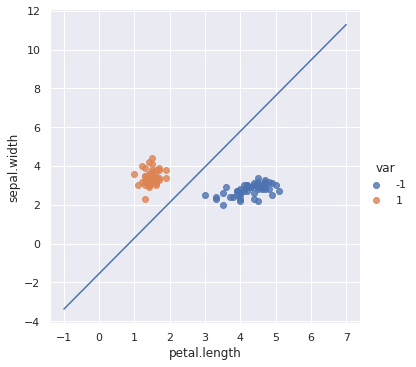

In [ ]:
plot_SVM(W_12,W0_12,iris_data_12)

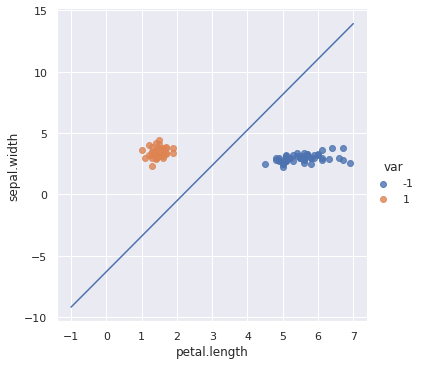

In [ ]:
plot_SVM(W_13,W0_13,iris_data_13)

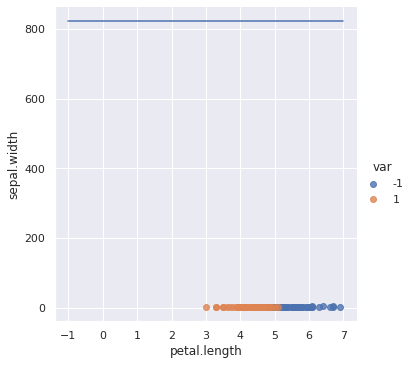

In [ ]:
plot_SVM(W_23,W0_23,iris_data_23)

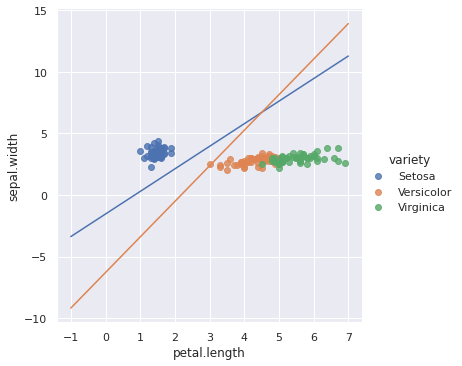

In [ ]:
a = np.linspace(-1,7,100)
b_12 = -a*W_12[0][0]/W_12[0][1] - W0_12[0]/W_12[0][1]
b_13 = -a*W_13[0][0]/W_13[0][1] - W0_13[0]/W_13[0][1]
# b_23 = -a*W_23[0][0]/W_23[0][1] - W0_23[0]/W_23[0][1]
sns.set(style="darkgrid")
sns.lmplot(x='petal.length',y='sepal.width', data=iris_data, fit_reg=False, hue='variety', legend=True)
# plt.scatter(data_up[:50][0], data_up[:50][1])
# plt.scatter(data_up[50:][0],data_up[50:][1])
plt.plot(a,b_12)
plt.plot(a,b_13)
# plt.plot(a,b_23)
plt.show()

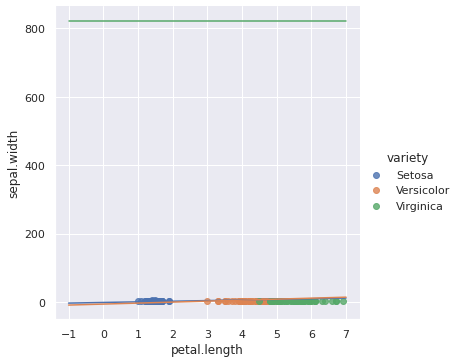

In [ ]:
a = np.linspace(-1,7,100)
b_12 = -a*W_12[0][0]/W_12[0][1] - W0_12[0]/W_12[0][1]
b_13 = -a*W_13[0][0]/W_13[0][1] - W0_13[0]/W_13[0][1]
b_23 = -a*W_23[0][0]/W_23[0][1] - W0_23[0]/W_23[0][1]
sns.set(style="darkgrid")
sns.lmplot(x='petal.length',y='sepal.width', data=iris_data, fit_reg=False, hue='variety', legend=True)
# plt.scatter(data_up[:50][0], data_up[:50][1])
# plt.scatter(data_up[50:][0],data_up[50:][1])
plt.plot(a,b_12)
plt.plot(a,b_13)
plt.plot(a,b_23)
plt.show()